<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > MLOps Project </h1>
<h2 style = "text-align:center" > Credit Card Fraud </h2>
<hr style="border-width:2px;border-color:#75DFC1">



## About Dataset
Source: [kaggel](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

> Digital payments are evolving, but so are cyber criminals.

> According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

>In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
This Dataset sourced by some unnamed institute.

### Feature Explanation:

>- **distancefromhome** - the distance from home where the transaction happened.
>- **distancefromlast_transaction** - the distance from last transaction happened.
>- **ratiotomedianpurchaseprice** - Ratio of purchased price transaction to median purchase price.
>- **repeat_retailer** - Is the transaction happened from same retailer.
>- **used_chip** - Is the transaction through chip (credit card).
>- **usedpinnumber** - Is the transaction happened by using PIN number.
>- **online_order** - Is the transaction an online order.
>- **fraud** - Is the transaction fraudulent.

In [1]:
import pandas as pd
import numpy as np

## Open Dataset

In [2]:
df=pd.read_csv('Datasets/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df[df.fraud==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [7]:
print(f"Our initial dataset has {len(df)} rows")

Our initial dataset has 1000000 rows


In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Data visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

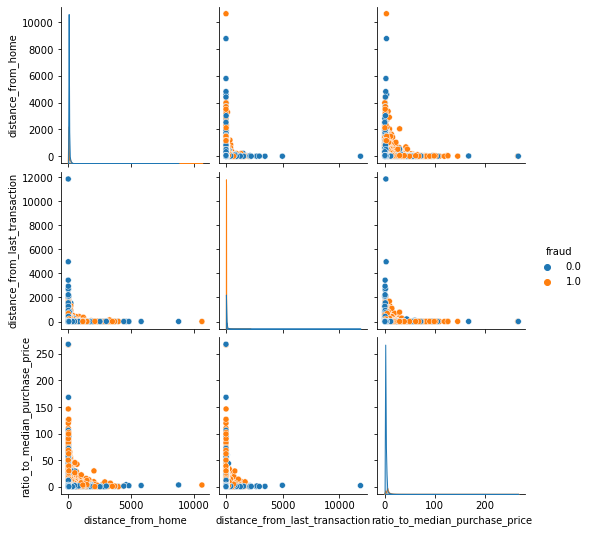

In [11]:
sns.pairplot(data=df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','fraud']], hue = 'fraud')
plt.show()

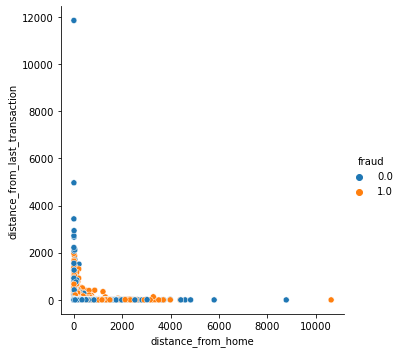

In [12]:
sns.relplot(x='distance_from_home', y='distance_from_last_transaction', hue='fraud', data=df)

<AxesSubplot:xlabel='distance_from_home', ylabel='Count'>

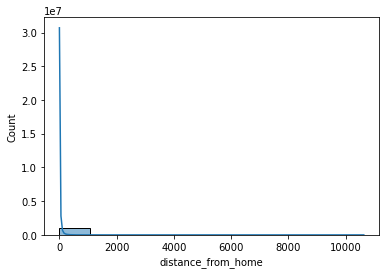

In [13]:
sns.histplot(df['distance_from_home'], bins=10, kde=True)

In [14]:
df['Log_home'] = np.log10(df['distance_from_home'])
df['Log_trans'] = np.log10(df['distance_from_last_transaction'])
df['Log_ratio'] = np.log10(df['ratio_to_median_purchase_price'])

<AxesSubplot:xlabel='Log_home', ylabel='Count'>

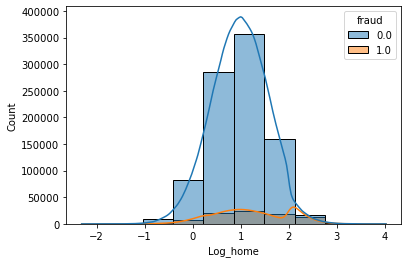

In [15]:
sns.histplot(data=df, x="Log_home", hue="fraud", bins=10, kde=True)

<AxesSubplot:xlabel='Log_trans', ylabel='Count'>

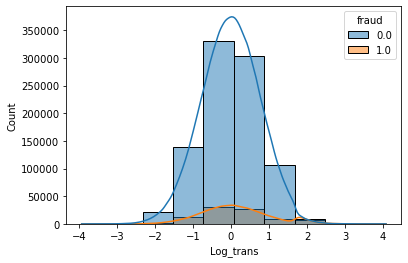

In [16]:
sns.histplot(data=df, x="Log_trans",hue="fraud", bins=10, kde=True)

<AxesSubplot:xlabel='Log_ratio', ylabel='Count'>

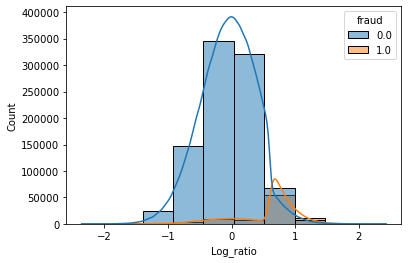

In [17]:
sns.histplot(data=df, x='Log_ratio',hue='fraud', bins=10, kde=True)

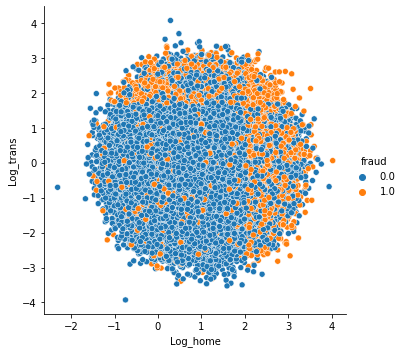

In [18]:
sns.relplot(x='Log_home', y='Log_trans', hue='fraud', data=df)

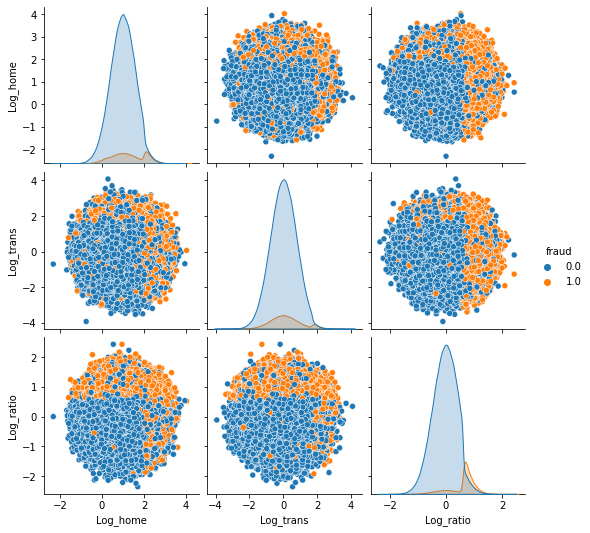

In [19]:
sns.pairplot(data=df[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns = ['fraud', 'Log_home','Log_trans','Log_ratio'])
y = df['fraud']

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, stratify = y_train)
print(f"The TrainSet has {y_train.shape[0]} rows")
print(f"The TestSet has {y_test.shape[0]} rows")
print(f"The ValSet has {y_val.shape[0]} rows")
# Scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


The TrainSet has 640000 rows
The TestSet has 200000 rows
The ValSet has 160000 rows


## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model_dt = DecisionTreeClassifier(max_depth = 8)
model_dt.fit(X_train_scaled,y_train)
print(f"Accuracy with scaler : {model_dt.score(scaler.transform(X_test),y_test)}")

Accuracy with scaler : 1.0


In [25]:
model_dt.fit(X_train,y_train)
print(f"Accuracy without scaler : {model_dt.score(X_test,y_test)}")

Accuracy without scaler : 1.0


In [26]:
# Scaler isn't mandatory

In [27]:
from sklearn.metrics import confusion_matrix

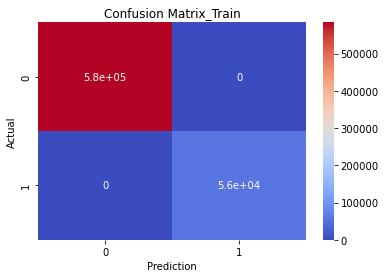

In [28]:
y_pred_train = model_dt.predict(X_train) 
c_matrix_train = confusion_matrix(y_train,y_pred_train)
ax = sns.heatmap(c_matrix_train, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Train')
plt.show()

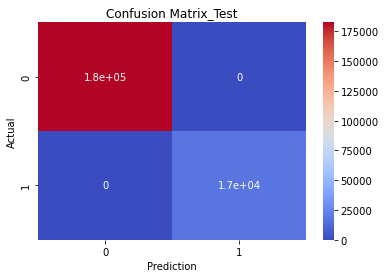

In [28]:
y_pred_test = model_dt.predict(scaler.transform(X_test)) 
c_matrix_test = confusion_matrix(y_test,y_pred_test)
ax = sns.heatmap(c_matrix, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Test')
plt.show()

/Users/pierresarzier/machinelearning/MLenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


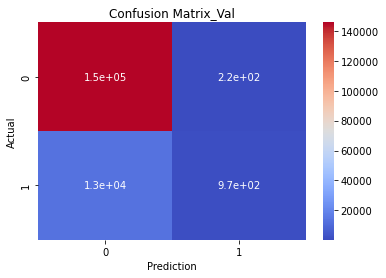

In [29]:
y_pred_val = model_dt.predict(scaler.transform(X_val)) 
c_matrix_val = confusion_matrix(y_val,y_pred_val)
ax = sns.heatmap(c_matrix_val, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Val')
plt.show()

In [30]:
y_test[y_test==1]

765315    1.0
371909    1.0
363489    1.0
669647    1.0
31585     1.0
         ... 
822037    1.0
450511    1.0
801389    1.0
960419    1.0
500047    1.0
Name: fraud, Length: 17481, dtype: float64

In [31]:
df.iloc[[689719]]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Log_home,Log_trans,Log_ratio
689719,4.158589,0.079312,8.314564,1.0,0.0,0.0,1.0,1.0,0.618946,-1.100659,0.919839


In [33]:
#y_test[689719]

In [36]:
model_dt.predict(X_test.iloc[[0]])

array([0.])

In [37]:
y_test.iloc[[0]]

608080    0.0
Name: fraud, dtype: float64

In [38]:
A=[4.158589,0.079312,8.314564,1,0,0,1]

In [39]:
test=pd.DataFrame([A])

In [40]:
test

,0,1,2,3,4,5,6
0,4.158589,0.079312,8.314564,1,0,0,1


In [41]:
model_dt.predict(test) 

/Users/pierresarzier/machinelearning/MLenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])

# Choose the right percentage

## Learning curves

In [42]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring='f1', name='Default'):
    model.fit(X_train, y_train)
    print("##############TRAINSET##############")
    y_train_pred = model.predict(X_train)
    print("Confusion_matrix_train: ")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification_report_test : ")
    print(classification_report(y_train, y_train_pred))
    print("##############TESTSET##############")
    y_test_pred = model.predict(X_test)
    print("Confusion_matrix_test: ")
    print(confusion_matrix(y_test, y_test_pred))
    print("Classification_report_test : ")
    print(classification_report(y_test, y_test_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = chosen_scoring, train_sizes=np.linspace(0.01, 1, 20))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis =1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(name)
    plt.legend()

##############TRAINSET##############
Confusion_matrix_train: 
[[584062      0]
 [     0  55938]]
Classification_report_test : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    584062
         1.0       1.00      1.00      1.00     55938

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000

##############TESTSET##############
Confusion_matrix_test: 
[[182519      0]
 [     0  17481]]
Classification_report_test : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



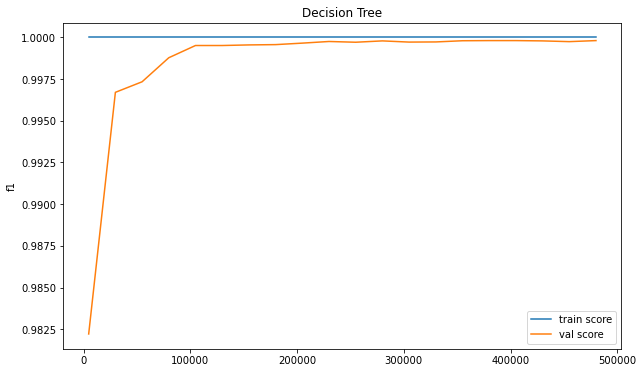

In [43]:
evaluate(model_dt, name ='Decision Tree')

# Model with Partial Data (1/1000)

In [44]:
df_partial = df.iloc[:df.shape[0]//1000, :]
df_partial.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Log_home,Log_trans,Log_ratio
995,9.873417,1.022586,0.346643,1.0,0.0,0.0,0.0,0.0,0.994467,0.009700,-0.460117
996,168.091704,6.304360,0.416833,1.0,1.0,0.0,0.0,0.0,2.225546,0.799641,-0.380038
997,44.047622,0.510298,0.624706,1.0,0.0,0.0,1.0,0.0,1.643922,-0.292176,-0.204324
998,2.998418,0.193681,0.743416,1.0,1.0,0.0,1.0,0.0,0.476892,-0.712914,-0.128768
999,38.133449,0.167059,3.965637,1.0,0.0,0.0,1.0,0.0,1.581306,-0.777130,0.598313


In [45]:
X_partial = df_partial.drop(columns = ['fraud', 'Log_home','Log_trans','Log_ratio'])
y_partial = df_partial['fraud']

# Train, Test, Split
X_partial_train, X_partial_test, y_partial_train, y_partial_test = train_test_split(X_partial,y_partial, test_size = 0.2, stratify = y_partial)

X_partial_train, X_partial_val, y_partial_train, y_partial_val = train_test_split(X_partial_train,y_partial_train, test_size = 0.2, stratify = y_partial_train)

In [46]:
model_partial = DecisionTreeClassifier(max_depth = 8)
model_partial.fit(X_partial_train,y_partial_train)


DecisionTreeClassifier(max_depth=8)

In [47]:
print(f"Train_accuracy : {model_partial.score(X_partial_train,y_partial_train)}")
print(f"Test_accuracy : {model_partial.score(X_partial_test,y_partial_test)}")
print(f"Val_accuracy : {model_partial.score(X_partial_val,y_partial_val)}")

Train_accuracy : 1.0
Test_accuracy : 0.98
Val_accuracy : 0.98125


# BentoML (When agree on % Data)

In [48]:
import bentoml
model_saved = bentoml.sklearn.save_model('CCF_partial', model_partial)
print(f"Saved Model : {model_saved.tag}")

Converting 'CCF_partial' to lowercase: 'ccf_partial'.


Saved Model : ccf_partial:zrasw7taegklxjuo


# Preprocessing function for BentML

In [49]:
def preprocessing_ccf(dataframe_ini):
    # Log10 Feature engineering
    dataframe_ini['Log_home'] = np.log10(dataframe_ini['distance_from_home'])
    dataframe_ini['Log_trans'] = np.log10(dataframe_ini['distance_from_last_transaction'])
    dataframe_ini['Log_ratio'] = np.log10(dataframe_ini['ratio_to_median_purchase_price'])
    # Features reduction
    